In [9]:
import torch
import classes
import matplotlib.pyplot as plt

Model : MLP; layers : 2


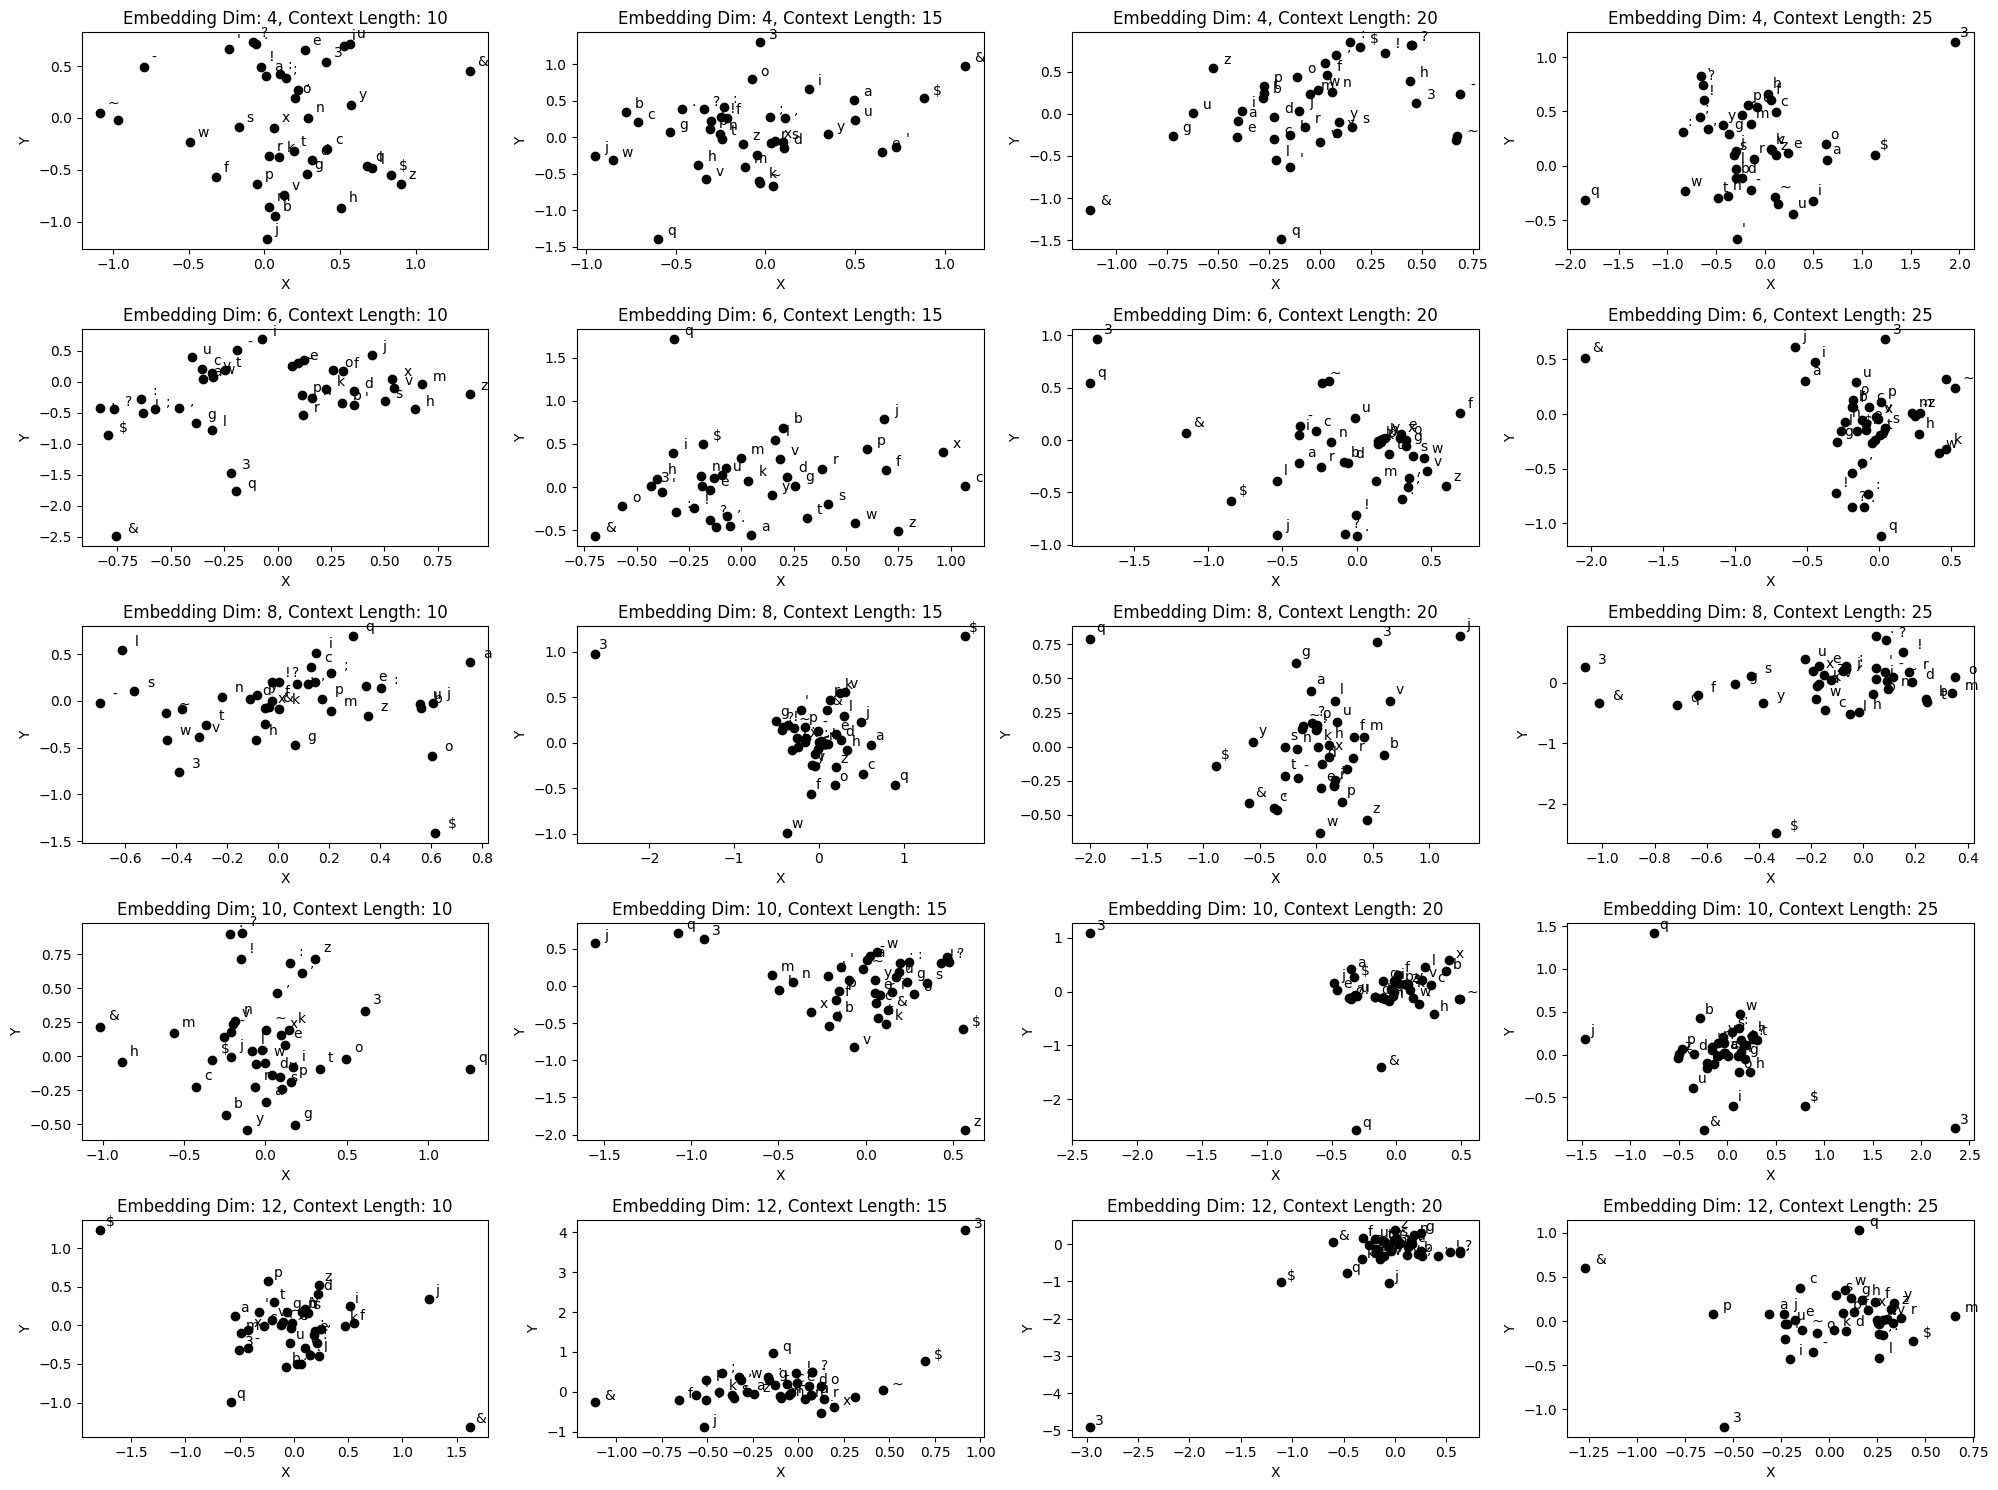

Model : MLP; layers : 3


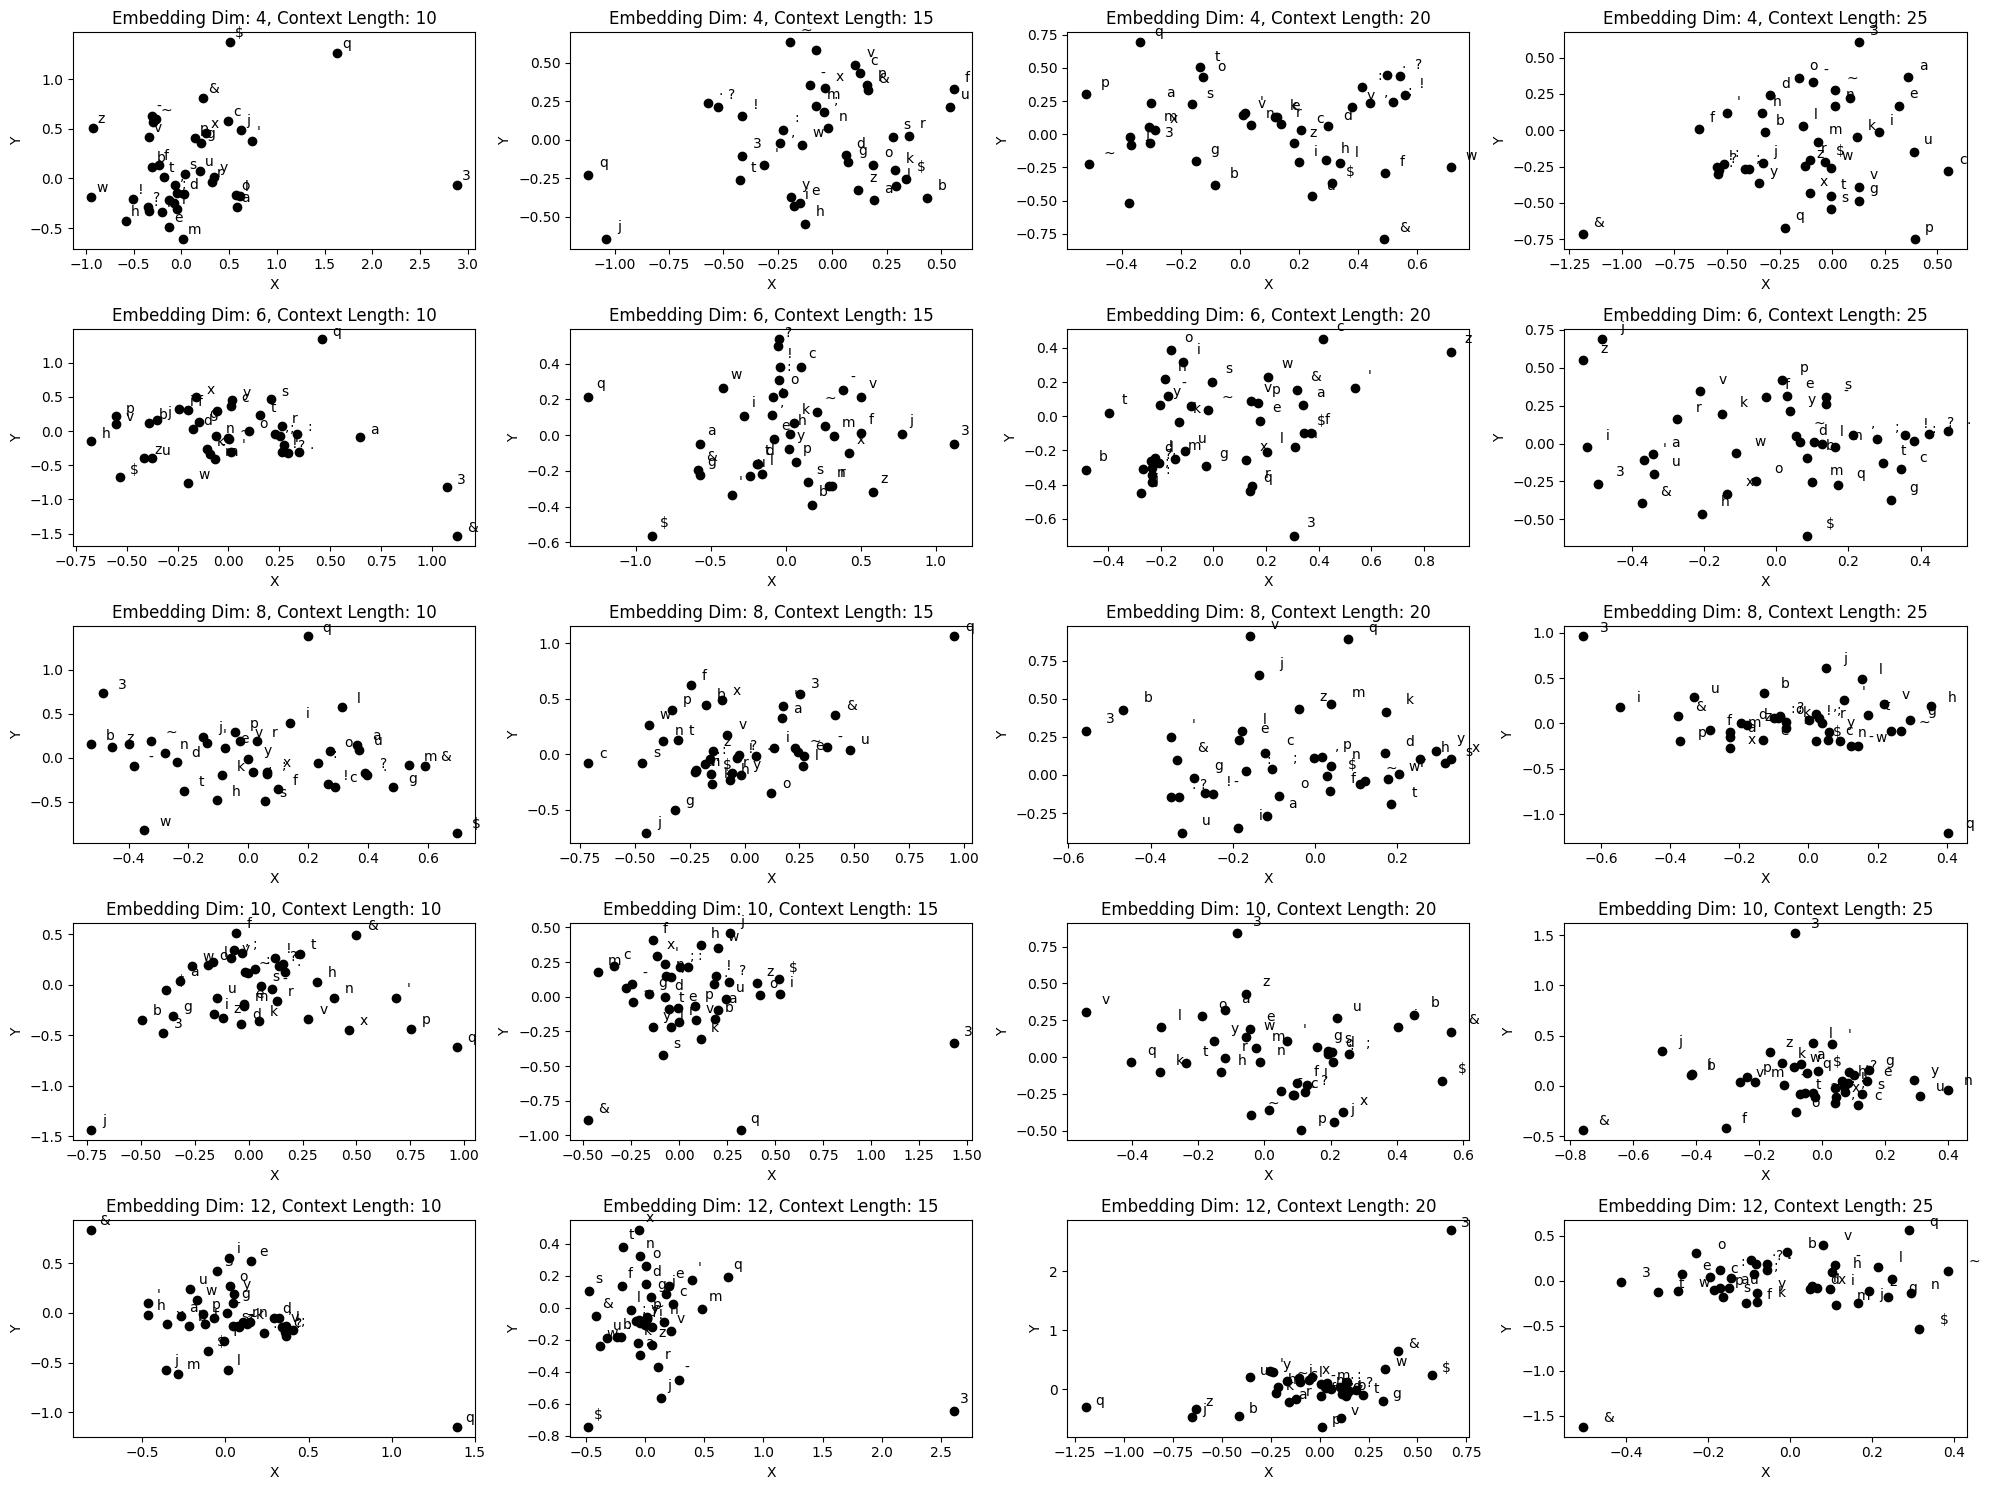

In [12]:
def find_model_path(model_type, e, b, h, h2 = 0):
    if model_type==0:
        return f"/Users/nimitt/Documents/ML/ML-ES335/q1/model_states/model_{b}_{e}_{h}.pt"
    elif model_type==1:
        return f"/Users/nimitt/Documents/ML/ML-ES335/q1/model_states/model_{b}_{e}_{h}_{h2}.pt"
    else :
        return "/Users/nimitt/Documents/ML/ML-ES335/q1/model_states/model2.pt"
    
block_sizes = [10,15,20,25]
emb_sizes= [4,6,8,10,12]

model_types = {"MLP; layers : 2":0, "MLP; layers : 3":1}
stored_X_tensors = torch.load("/Users/nimitt/Documents/ML/ML-ES335/q1/model_states/10.pt")
stoi,itos =  stored_X_tensors['stoi'], stored_X_tensors['itos'] 

def plot(model_type, emb_size, block_size, ax):
    hidden_size = 100
    hidden_size_2 = 50
    if model_type == 0:
        model = classes.NextChar(block_size,len(stoi),emb_size,hidden_size)
    elif model_type == 1:
        model = classes.NextCharDense(block_size,len(stoi),emb_size,hidden_size,hidden_size_2)
    else:
        model = classes.NextChar(block_size,len(stoi),emb_size,hidden_size)

    model_path = find_model_path(model_type, emb_size, block_size, hidden_size,hidden_size_2)
    model = torch.compile(model)
    opt = torch.optim.AdamW(model.parameters(), lr=0.01)
    classes.load_check_points(model,opt,model_path)

    for i in range(len(itos)):
        x, y = model.emb.weight[i][0:2].detach().cpu().numpy()
        ax.scatter(x, y, color='k')
        ax.text(x + 0.05, y + 0.05, itos[i])

    ax.set_title(f"Embedding Dim: {emb_size}, Context Length: {block_size}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    return model

fig, axs = plt.subplots(len(emb_sizes), len(block_sizes), figsize=(20, 15))

print("Model : MLP; layers : 2")
for i, emb_size in enumerate(emb_sizes):
    for j, block_size in enumerate(block_sizes):
        model_type = 0  # Adjust this according to your requirement
        model = plot(model_type, emb_size, block_size, axs[i, j])

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(len(emb_sizes), len(block_sizes), figsize=(20, 15))
print("Model : MLP; layers : 3")
for i, emb_size in enumerate(emb_sizes):
    for j, block_size in enumerate(block_sizes):
        model_type = 1  # Adjust this according to your requirement
        model = plot(model_type, emb_size, block_size, axs[i, j])

plt.tight_layout()
plt.show()

